In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay, r2_score

In [2]:
data = pd.read_csv("weather_data.csv")

In [3]:
data

,time,temperature
0,2020-01-01 00:00,1.2
1,2020-01-01 01:00,0.6
2,2020-01-01 02:00,0.3
3,2020-01-01 03:00,0.1
4,2020-01-01 04:00,0.3
...,...,...
29707,2023-05-22 19:00,NaN
29708,2023-05-22 20:00,NaN
29709,2023-05-22 21:00,NaN
29710,2023-05-22 22:00,NaN


In [4]:
data.isnull().sum()

time             0
temperature    168
dtype: int64

In [5]:
data = data.dropna()
print(data)


                   time  temperature
0      2020-01-01 00:00          1.2
1      2020-01-01 01:00          0.6
2      2020-01-01 02:00          0.3
3      2020-01-01 03:00          0.1
4      2020-01-01 04:00          0.3
...                 ...          ...
29539  2023-05-15 19:00         18.9
29540  2023-05-15 20:00         17.4
29541  2023-05-15 21:00         16.2
29542  2023-05-15 22:00         15.1
29543  2023-05-15 23:00         14.0

[29544 rows x 2 columns]


In [6]:
data.isnull().sum()

time           0
temperature    0
dtype: int64

In [7]:
data['time'] = pd.to_datetime(data['time'])

# Extract the day and hour from the 'time' column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour
data.drop('time', axis = 1, inplace = True)


print(data)

       temperature  year  month  day  hour
0              1.2  2020      1    1     0
1              0.6  2020      1    1     1
2              0.3  2020      1    1     2
3              0.1  2020      1    1     3
4              0.3  2020      1    1     4
...            ...   ...    ...  ...   ...
29539         18.9  2023      5   15    19
29540         17.4  2023      5   15    20
29541         16.2  2023      5   15    21
29542         15.1  2023      5   15    22
29543         14.0  2023      5   15    23

[29544 rows x 5 columns]


/tmp/ipykernel_15718/1124732442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])
/tmp/ipykernel_15718/1124732442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['time'].dt.year
/tmp/ipykernel_15718/1124732442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [8]:
# Separate the features (day and hour) from the target variable (temperature)
X = data.drop(['temperature'], axis = 1)
y = data['temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
#model = LinearRegression()
model = RandomForestRegressor() 
#model = AdaBoostClassifier(algorithm='SAMME.R', n_estimators=85, learning_rate=1.5, random_state=2001)
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor()

R2 Score: 0.976
mean square error: 0.9899063269588756
mean absolute error: 0.6843838212895582
root mean square error: 0.9949403635187767


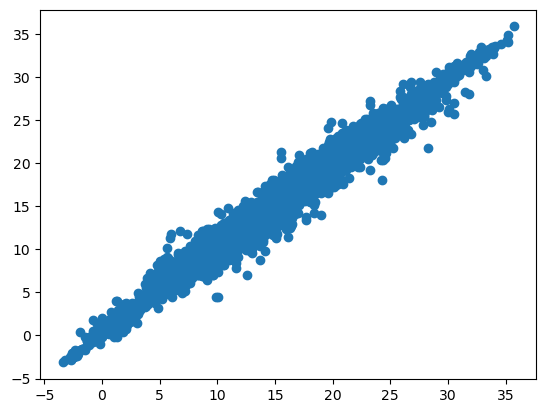

In [9]:
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.x = "Y Expected"
plt.y = "Y Predict"
print("R2 Score: %.3f" % r2_score(y_test, y_pred))
print("mean square error: "+ str(mean_squared_error(y_test, y_pred)))
print("mean absolute error: "+ str(mean_absolute_error(y_test, y_pred)))
print("root mean square error: "+ str(mean_squared_error(y_test, y_pred, squared= False)))

In [10]:
df = pd.DataFrame({'Test': y_test, 'Predicted': y_pred})
df

,Test,Predicted
27516,17.4,16.818
21537,18.6,20.707
17361,10.7,10.880
17017,11.2,11.174
23087,20.9,19.869
...,...,...
27744,0.1,0.684
7268,10.9,11.469
8658,8.0,8.669
23649,21.3,21.217


In [11]:
# Make predictions for the next day
next_day = pd.DataFrame({
    'year': [2023] * 24,
    'month': [5] * 24,
    'day': [16] * 24,
    'hour': range(24)
})
print(next_day)
next_day_predictions = model.predict(next_day)

# Print the predicted temperatures for the next day
print(next_day_predictions)

    year  month  day  hour
0   2023      5   16     0
1   2023      5   16     1
2   2023      5   16     2
3   2023      5   16     3
4   2023      5   16     4
5   2023      5   16     5
6   2023      5   16     6
7   2023      5   16     7
8   2023      5   16     8
9   2023      5   16     9
10  2023      5   16    10
11  2023      5   16    11
12  2023      5   16    12
13  2023      5   16    13
14  2023      5   16    14
15  2023      5   16    15
16  2023      5   16    16
17  2023      5   16    17
18  2023      5   16    18
19  2023      5   16    19
20  2023      5   16    20
21  2023      5   16    21
22  2023      5   16    22
23  2023      5   16    23
[12.695 12.077 11.679 11.254 10.619 10.624 10.663 12.793 15.045 16.832
 18.389 19.591 20.951 21.542 21.774 21.91  21.8   21.162 20.205 18.61
 17.08  15.958 14.95  13.99 ]
